In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook: # maquina virtual colab
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR  = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR    = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
    MODELOS_DIR  = '/content/drive/MyDrive/Colab Notebooks/MODELOS/'    # carpeta donde se encuentran los modelos
    ARCHIVOS_DIR = '/content/drive/MyDrive/Colab Notebooks/ARCHIVOS/'   # carpeta recuperar o copiar archivos
else: # maquina local ipython
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR  = '../Fuentes'     # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
    MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
    ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

# Ejercicio 6

El archivo Zoo.csv contiene información de 101 animales caracterizados por los siguientes atributos

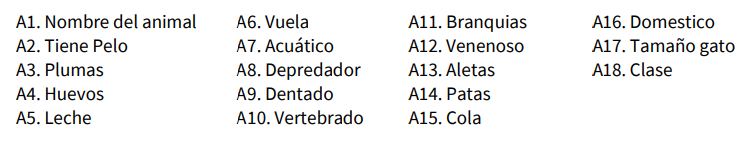

Salvo los atributos A1 y A18 que contienen texto y el A14 que contiene el número de patas del animal, el 
resto toma el valor 1 si el animal posee la característica y 0 si no. Hay 7 valores de clase posible (atributo 
A18): mamífero, ave, pez, invertebrado, insecto, reptil y anfibio.

- a) Realice un gráfico que visualice de la cantidad de ejemplos por cada valor del atributo clase y analice 
que tipos de problema podrían surgir al entrenar un modelo para clasificación.
- b) Utilice todos los ejemplos para entrenar un perceptrón que sea capaz de reconocer si un animal es un 
mamífero. Entrene varias veces si es necesario y verifique que funcione correctamente.
- c) Observe los pesos del perceptrón entrenado en a) ¿Puede determinar cuáles son las características más 
relevantes para decidir si se trata de un mamífero o no? Realice varias ejecuciones independientes y 
observe si las características más relevantes siguen siendo las mismas.
- d) Repita b) y c) para las aves.
- e) Repita b) y c) para los reptiles

In [2]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos


nombre_archivo = DATOS_DIR + 'zoo.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe
# print(df)
display(df)

,animal,Tiene_Pelo,Tiene_Plumas,Nace_de_huevo,Toma_Leche,Vuela,Acuatico,Depredador,Dentado,Vertebrado,Respira,Venenoso,Tiene_Aletas,Cant_Patas,Tiene_Cola,Domestico,Tamano_Gato,Clase
0,oso_hormiguero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
1,antilope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mamifero
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Pez
3,oso,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
4,jabali,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,canguro,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,Mamifero
97,avispa,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,Insecto
98,lobo,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero
99,gusano,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,Invertebrado


### Inciso a

Realice un gráfico que visualice de la cantidad de ejemplos por cada valor del atributo clase y analice 
que tipos de problema podrían surgir al entrenar un modelo para clasificación.

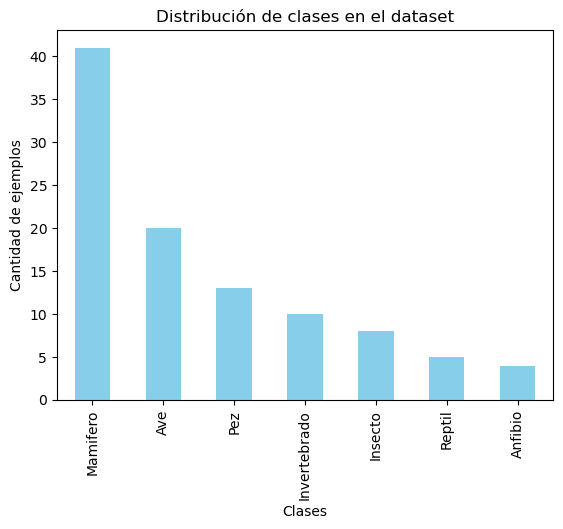

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Gráfico de barras para visualizar la cantidad de ejemplos por clase (A18)
df['Clase'].value_counts().plot(kind='bar', color='skyblue')

# Etiquetas y título del gráfico
plt.xlabel('Clases')
plt.ylabel('Cantidad de ejemplos')
plt.title('Distribución de clases en el dataset')
plt.show()


En el grafico se ve que hay un desbalance de clases. 
- SESGO hacia las clases mayoritarias
- Rendimiento pobre hacia las clases minoritarias

### Inciso b

Utilice todos los ejemplos para entrenar un perceptrón que sea capaz de reconocer si un animal es un 
mamífero. Entrene varias veces si es necesario y verifique que funcione correctamente.

mamífero, ave, pez, invertebrado, insecto, reptil y anfibio

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import model_selection,preprocessing
from ClassPerceptron import Perceptron
from matplotlib import pylab as plt

In [11]:
import numpy as np
X = np.array(df.iloc[:,1:-1]) #todas menos la ultima y la primera
Y = np.array((df['Clase'] ==  'Ave') * 1) #le pongo 1 si es mamifero, 0 cc

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y, test_size=0.30, random_state=42)

In [13]:
normalizarEntrada = 1  # 1 si normaliza; 0 si no
if normalizarEntrada:
    # Normaliza utilizando la media y el desvio
    normalizador= preprocessing.StandardScaler()
    
    X_train = normalizador.fit_transform(X_train)
    X_test  = normalizador.transform(X_test)

In [14]:
ppn = Perceptron(alpha=0.05, n_iter=200, random_state=None)
ppn.fit(X_train, y_train)

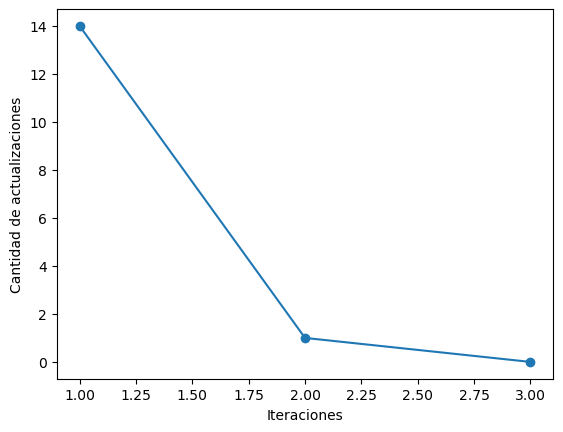

In [15]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

In [16]:
Y_pred = ppn.predict(X_test)

aciertos = sum(Y_pred == y_test)
print("aciertos = ", aciertos)

nAciertos = sum(Y_pred == y_test)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X_test.shape[0]))

aciertos =  30
% de aciertos = 96.77 %


### Inciso c

Observe los pesos del perceptrón entrenado en a) ¿Puede determinar cuáles son las características más 
relevantes para decidir si se trata de un mamífero o no? Realice varias ejecuciones independientes y 
observe si las características más relevantes siguen siendo las mismas.

In [66]:
pesos = ppn.w_
pesos

array([ 0.03446951,  0.19483907, -0.40300463,  0.58764729, -0.2957355 ,
        0.16619862,  0.19532539,  0.17163761, -0.31575626,  0.17527507,
       -0.31393304, -0.28783402,  0.1061851 ,  0.30200761,  0.24907983,
       -0.01613669])

In [67]:
for i, peso in enumerate(pesos): #enumerate devuelve indice y elemento
    print(f"  {df.columns[i+1]} tiene un peso de {peso:.4f}")


  Tiene_Pelo tiene un peso de 0.0345
  Tiene_Plumas tiene un peso de 0.1948
  Nace_de_huevo tiene un peso de -0.4030
  Toma_Leche tiene un peso de 0.5876
  Vuela tiene un peso de -0.2957
  Acuatico tiene un peso de 0.1662
  Depredador tiene un peso de 0.1953
  Dentado tiene un peso de 0.1716
  Vertebrado tiene un peso de -0.3158
  Respira tiene un peso de 0.1753
  Venenoso tiene un peso de -0.3139
  Tiene_Aletas tiene un peso de -0.2878
  Cant_Patas tiene un peso de 0.1062
  Tiene_Cola tiene un peso de 0.3020
  Domestico tiene un peso de 0.2491
  Tamano_Gato tiene un peso de -0.0161


ITERACION 1 : Las caracteristicas mas relevantes para decidir si es un mamifero son: PELO, PLUMAS, NACE DE HUEVO y TOMA LECHE - 600 iteraciones

ITERACION 2: 400 iteraciones, mismas caracteristicas

ITERACION 3: 200 iteraciones, mismas caracteristicas